In [1]:
import datetime

print("investigator: Thomas Walle\n")
print('date:')
print(datetime.datetime.now())

# Which python
import sys

sys.path[2]

investigator: Thomas Walle

date:
2021-02-11 05:29:35.635088


'/home/wallet/miniconda3/envs/2020_Peer_CITEseq_lilac/lib/python3.8'

In [2]:
# scanpy packages 
import scanpy as sc
import scanpy.external as sce
import anndata as anndata

# Before importing diffxpy.api or batchglm.api in your python session, execute:
import os
os.environ.setdefault("TF_NUM_THREADS", "1")
os.environ.setdefault("TF_LOOP_PARALLEL_ITERATIONS", "1")
import diffxpy.api as de

# Laughney packages
from anndata import AnnData
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
from copy import deepcopy
from colors import rgb, hex
import scipy.cluster.hierarchy as hc
import scipy as scipy
from scipy.stats import ttest_ind
from scipy.sparse import csr_matrix
import colors as colors

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager
from matplotlib import rcParams

%matplotlib inline

# other packages
import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
import scipy.stats
from statistics import median
from statistics import mean
from scanpy.external.pp import magic
from kneed import KneeLocator
import doubletdetection
import gseapy as gp


In [3]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.11.0
scipy==1.5.3
scanpy==1.6.0
pandas==1.0.3
numpy==1.18.1
matplotlib==3.1.3
magic==0.1.1
kneed==0.7.0
h5py==2.10.0
gseapy==0.9.17
doubletdetection==2.5.2
diffxpy==0.7.4
anndata==0.7.5


In [4]:
# FUNCTIONS

# Randomize cells for plotting UMAP
def randomize_cells(anndata_object):
    
    "Randomize cells for plotting UMAP"
    
    index_list = np.arange(anndata_object.shape[0])
    np.random.shuffle(index_list)
    anndata_object = anndata_object[index_list]
    
    return anndata_object

In [5]:
# define colors

sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300, frameon=False, vector_friendly=True, fontsize=7, figsize=(10,10), color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')

color_map_clusters = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

godsnot_64 = [
    # "#000000",  # remove the black, as often, we have black colored annotation
    "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
    "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
    "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
    "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
    "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
    "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
    "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
    "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
    "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
    "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
    "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72"]

color_map_bimodal = ['#e1e1e1','#FF4A46']

color_map_clusters_plt = cm = LinearSegmentedColormap.from_list(
        'color_map_clusters', color_map_clusters)

In [6]:
#load data

In [7]:
adata_path = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-all_samples_raw_filtered_normalized_log1p_clustered_nodrop_revised.h5ad'


batch_list = [
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24']

csv_save_path = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final'

In [9]:
adata_nodrops = sc.read(adata_path)
adata_nodrops

AnnData object with n_obs × n_vars = 170702 × 20761
    obs: 'batch', 'primary_tumor', 'Limited', 'PValue_emptydrops', 'FDR_emptydrops', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell', 'empty_droplet_sig'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
adata_nodrops#set X to raw
adata_nodrops.X = adata_nodrops.raw[adata_nodrops.obs_names, adata_nodrops.var_names].X
print(adata_nodrops.X)

  (0, 7531)	1.0
  (0, 20388)	2.0
  (0, 2670)	4.0
  (0, 563)	1.0
  (0, 18340)	1.0
  (0, 9999)	6.0
  (0, 13825)	1.0
  (0, 1520)	1.0
  (0, 1009)	1.0
  (0, 3775)	1.0
  (0, 9210)	1.0
  (0, 9911)	1.0
  (0, 20444)	1.0
  (0, 10085)	1.0
  (0, 10890)	2.0
  (0, 15082)	1.0
  (0, 2582)	1.0
  (0, 7282)	1.0
  (0, 8419)	1.0
  (0, 6404)	1.0
  (0, 17437)	1.0
  (0, 16935)	1.0
  (0, 18776)	4.0
  (0, 9548)	1.0
  (0, 1092)	1.0
  :	:
  (170701, 15356)	1.0
  (170701, 20389)	1.0
  (170701, 5756)	1.0
  (170701, 2816)	1.0
  (170701, 10491)	4.0
  (170701, 11117)	1.0
  (170701, 57)	1.0
  (170701, 12386)	1.0
  (170701, 1912)	1.0
  (170701, 13309)	2.0
  (170701, 3022)	1.0
  (170701, 1260)	1.0
  (170701, 17113)	1.0
  (170701, 8982)	1.0
  (170701, 11777)	1.0
  (170701, 3901)	1.0
  (170701, 13790)	1.0
  (170701, 5989)	1.0
  (170701, 15436)	1.0
  (170701, 7521)	1.0
  (170701, 10507)	1.0
  (170701, 10279)	2.0
  (170701, 15532)	1.0
  (170701, 5553)	1.0
  (170701, 14526)	1.0


In [16]:
#use doublet detection Jonathan Shor package https://github.com/JonathanShor/DoubletDetection.git
#import 
clf = doubletdetection.BoostClassifier()

In [17]:
set(adata_nodrops.obs["batch"])

{'N01',
 'N02',
 'N03',
 'N04',
 'N05',
 'N06',
 'N07',
 'N08',
 'N09',
 'N10',
 'N11',
 'T01',
 'T02',
 'T03',
 'T04',
 'T06',
 'T07',
 'T08',
 'T09',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24'}

In [18]:
adata_nodrops = adata_nodrops[adata_nodrops.obs['batch'].isin(batch_list)]
adata_nodrops.obs

batch  primary_tumor Limited  PValue_emptydrops  \
cell_ID                                                               
236170007923556-T24   T24           True    True             0.0001   
126218833450923-T22   T22           True    True             0.0001   
170265199462821-T22   T22           True    True             0.0001   
231760552999643-T18   T18           True    True             0.0001   
191760448838884-T19   T19           True    True             0.0001   
...                   ...            ...     ...                ...   
204816853621596-T18   T18           True    True             0.0001   
200562850548069-T19   T19           True    True             0.0001   
134539692686764-T21   T21           True    True             0.0001   
157477617232108-T22   T22           True    True             0.0001   
227991451483061-T24   T24           True    True             0.0001   

                     FDR_emptydrops  total_molecules  n_genes  \
cell_ID                                                         
236170007923556-T24        0.003602           1985.0      853   
126218833450923-T22        0.003739          11118.0     2792   
170265199462821-T22        0.003739           2201.0      814   
231760552999643-T18        0.005402           1156.0      491   
191760448838884-T19        0.003555           3765.0     1484   
...                             ...              ...      ...   
204816853621596-T18        0.005402          29505.0     5066   
200562850548069-T19        0.003555           3713.0     1279   
134539692686764-T21        0.007555           2579.0     1005   
157477617232108-T22        0.003739          31115.0     5167   
227991451483061-T24        0.003602           3944.0     1443   

                     n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
cell_ID                                                                         
236170007923556-T24                853                 6.749931        1985.0   
126218833450923-T22               2792                 7.934872       11118.0   
170265199462821-T22                814                 6.703188        2201.0   
231760552999643-T18                491                 6.198479        1156.0   
191760448838884-T19               1484                 7.303170        3765.0   
...                                ...                      ...           ...   
204816853621596-T18               5066                 8.530504       29504.0   
200562850548069-T19               1279                 7.154615        3713.0   
134539692686764-T21               1005                 6.913737        2578.0   
157477617232108-T22               5167                 8.550241       31115.0   
227991451483061-T24               1443                 7.275172        3943.0   

                     log1p_total_counts  pct_counts_in_top_50_genes  \
cell_ID                                                               
236170007923556-T24            7.593878                   39.848866   
126218833450923-T22            9.316411                   36.814175   
170265199462821-T22            7.697121                   45.933667   
231760552999643-T18            7.053586                   58.391003   
191760448838884-T19            8.233768                   33.837981   
...                                 ...                         ...   
204816853621596-T18           10.292315                   33.700515   
200562850548069-T19            8.219865                   37.947751   
134539692686764-T21            7.855157                   54.189294   
157477617232108-T22           10.345477                   34.285714   
227991451483061-T24            8.279951                   36.165356   

                     pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
cell_ID                                                                         
236170007923556-T24                    53.501259                    65.491184   
126218833450923-T22          

In [19]:

batches = set(batch_list)
sorted(batches)

['T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24']

In [20]:
#labels` is a 1-dimensional `numpy ndarray` with the value `1` representing a detected doublet, `0` a singlet, and `np.nan` an ambiguous cell.
#Run `DoubletDetection` independently for each sample (suggestion by DPeer Lab).*

In [21]:
#fix keyword probem with scanpy DoubletDetection incompatibility
clf.phenograph_parameters.pop('verbosity')

1

In [22]:
for batch in sorted(batches):
    labels = clf.fit(adata_nodrops[adata_nodrops.obs["batch"] == batch].X).predict(p_thresh=1e-16, voter_thresh=0.5)
    #retrieve indices
    index = adata_nodrops[adata_nodrops.obs['batch']==batch].obs_names
    doublets_df = pd.DataFrame({
    "index":
    index,
    "call":
    pd.Series(labels).replace([0.0, 1.0, np.nan],
                              ["01_singlet", "02_doublet", "03_ambigous"])
    })
    doublets_df.set_index("index", inplace=True)
    save_path = csv_save_path + '_' + batch +'.csv'
    doublets_df.to_csv(save_path)
    print('saved batch:',batch, ', to:', save_path)

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5826196670532227 seconds
Jaccard graph constructed in 3.418565034866333 seconds
Wrote graph to binary file in 0.24532437324523926 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.907223
After 6 runs, maximum modularity is Q = 0.908344
Louvain completed 26 runs in 2.7976412773132324 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 9.402364730834961 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5758240222930908 seconds
Jaccard graph constructed in 3.5260045528411865 seconds
Wrote graph to binary file in 0.23769140243530273 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.906114
After 2 runs, maximum modularity is Q = 0.907891
Louvain completed 

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.326068639755249 seconds
Jaccard graph constructed in 3.840759038925171 seconds
Wrote graph to binary file in 0.43900299072265625 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.925999
After 7 runs, maximum modularity is Q = 0.927126
Louvain completed 27 runs in 4.099867343902588 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 12.036030769348145 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.3393023014068604 seconds
Jaccard graph constructed in 3.9206979274749756 seconds
Wrote graph to binary file in 0.45279932022094727 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.926684
After 8 runs, maximum modularity is Q = 0.928335
Louvain completed 2

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1245572566986084 seconds
Jaccard graph constructed in 2.9764583110809326 seconds
Wrote graph to binary file in 0.04136919975280762 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.897305
After 3 runs, maximum modularity is Q = 0.898641
Louvain completed 23 runs in 2.1537797451019287 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 7.666516542434692 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.06472659111022949 seconds
Jaccard graph constructed in 3.014824867248535 seconds
Wrote graph to binary file in 0.04197263717651367 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.894676
Louvain completed 21 runs in 1.6513824462890625 seconds
Sorting co

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.21243715286254883 seconds
Jaccard graph constructed in 3.0936615467071533 seconds
Wrote graph to binary file in 0.05255842208862305 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.909819
After 9 runs, maximum modularity is Q = 0.910842
Louvain completed 29 runs in 2.4538841247558594 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 8.251396179199219 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.22849774360656738 seconds
Jaccard graph constructed in 3.080253839492798 seconds
Wrote graph to binary file in 0.17804598808288574 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.90936
Louvain completed 21 runs in 1.7216792106628418 seconds
Sorting co

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.4846198558807373 seconds
Jaccard graph constructed in 3.3261492252349854 seconds
Wrote graph to binary file in 0.22975707054138184 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.917876
After 4 runs, maximum modularity is Q = 0.919515
Louvain completed 24 runs in 2.6963343620300293 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 9.103169679641724 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.49074292182922363 seconds
Jaccard graph constructed in 3.5518059730529785 seconds
Wrote graph to binary file in 0.2143106460571289 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.918464
Louvain completed 21 runs in 2.0696394443511963 seconds
Sorting co

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9760611057281494 seconds
Jaccard graph constructed in 3.9178261756896973 seconds
Wrote graph to binary file in 0.41096067428588867 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.931257
Louvain completed 21 runs in 2.6964457035064697 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 10.565296173095703 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9916625022888184 seconds
Jaccard graph constructed in 3.916499376296997 seconds
Wrote graph to binary file in 0.2876248359680176 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.930173
After 10 runs, maximum modularity is Q = 0.931182
Louvain completed 30 runs in 4.1159348487854 seconds
Sorting commu

Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.4983785152435303 seconds
Jaccard graph constructed in 4.000823736190796 seconds
Wrote graph to binary file in 0.2770812511444092 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.92549
Louvain completed 21 runs in 2.489448308944702 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 9.863171815872192 seconds
Setting directed=False because prune=True
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.3737461566925049 seconds
Jaccard graph constructed in 3.8633527755737305 seconds
Wrote graph to binary file in 0.40865135192871094 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.924378
After 2 runs, maximum modularity is Q = 0.925858
Louvain completed 22 runs in 2.892829179763794 seconds
Sorting communi

## concatenate doubletdetection output of normal and tumor samples

In [23]:

#paths
files_path = "/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_*.csv"
adata_path = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-all_samples_raw_filtered_normalized_log1p_clustered_nodrop_revised.h5ad'
save_path_adata = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-all_samples_raw_filtered_normalized_log1p_clustered_nodrop_nodub_revised_final.h5ad'

In [26]:
files = glob.glob(files_path)
sorted(files)

['/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N01.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N02.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N03.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N04.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-

In [27]:
adata_nodrops = sc.read(adata_path)
adata_nodrops

AnnData object with n_obs × n_vars = 170702 × 20761
    obs: 'batch', 'primary_tumor', 'Limited', 'PValue_emptydrops', 'FDR_emptydrops', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell', 'empty_droplet_sig'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [37]:
#concatenate doubletdetection outputs
file_list = []
for i in files:
    doublets = pd.read_csv(i,sep=',', index_col='index')
    file_list.append(doublets)

In [38]:
#concatenate tumor and normal dataframes
doublets_df = pd.concat(file_list)
doublets_df

call
index                          
196163883456293-T20  01_singlet
166288072231854-T20  01_singlet
129565671941934-T20  01_singlet
165945567197494-T20  01_singlet
199865979586285-T20  01_singlet
...                         ...
164753425943453-N07  01_singlet
201111654320348-N07  01_singlet
227844214639006-N07  01_singlet
131309589970142-N07  01_singlet
130531395751326-N07  01_singlet

[170702 rows x 1 columns]

In [40]:
#percentage doublets
doublets_df['call'].value_counts()

01_singlet     166579
02_doublet       4111
03_ambigous        12
Name: call, dtype: int64

In [41]:
#add to adata
adata_nodrops.obs["doublets"] = doublets_df

In [42]:
adata_nodrops.write(save_path_adata)


... storing 'doublets' as categorical


## remove doublets

In [43]:
adata_nodrops_nodub = sc.read('/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-all_samples_raw_filtered_normalized_log1p_clustered_nodrop_nodub_revised_final.h5ad') 

In [44]:
adata_nodrops_nodub

AnnData object with n_obs × n_vars = 170702 × 20761
    obs: 'batch', 'primary_tumor', 'Limited', 'PValue_emptydrops', 'FDR_emptydrops', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell', 'empty_droplet_sig', 'doublets'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [45]:
print('number of nan cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='03_ambiguous']))
print('number of doublet cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='02_doublet']))
print('number of singlet cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='01_singlet']))
print('nan containing samples:', set(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='nan'].obs['batch']))
print('number of cells in tumor samples:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['primary_tumor']==True]))

number of nan cells: 0
number of doublet cells: 4111
number of singlet cells: 166579
nan containing samples: set()
number of cells in tumor samples: 115135


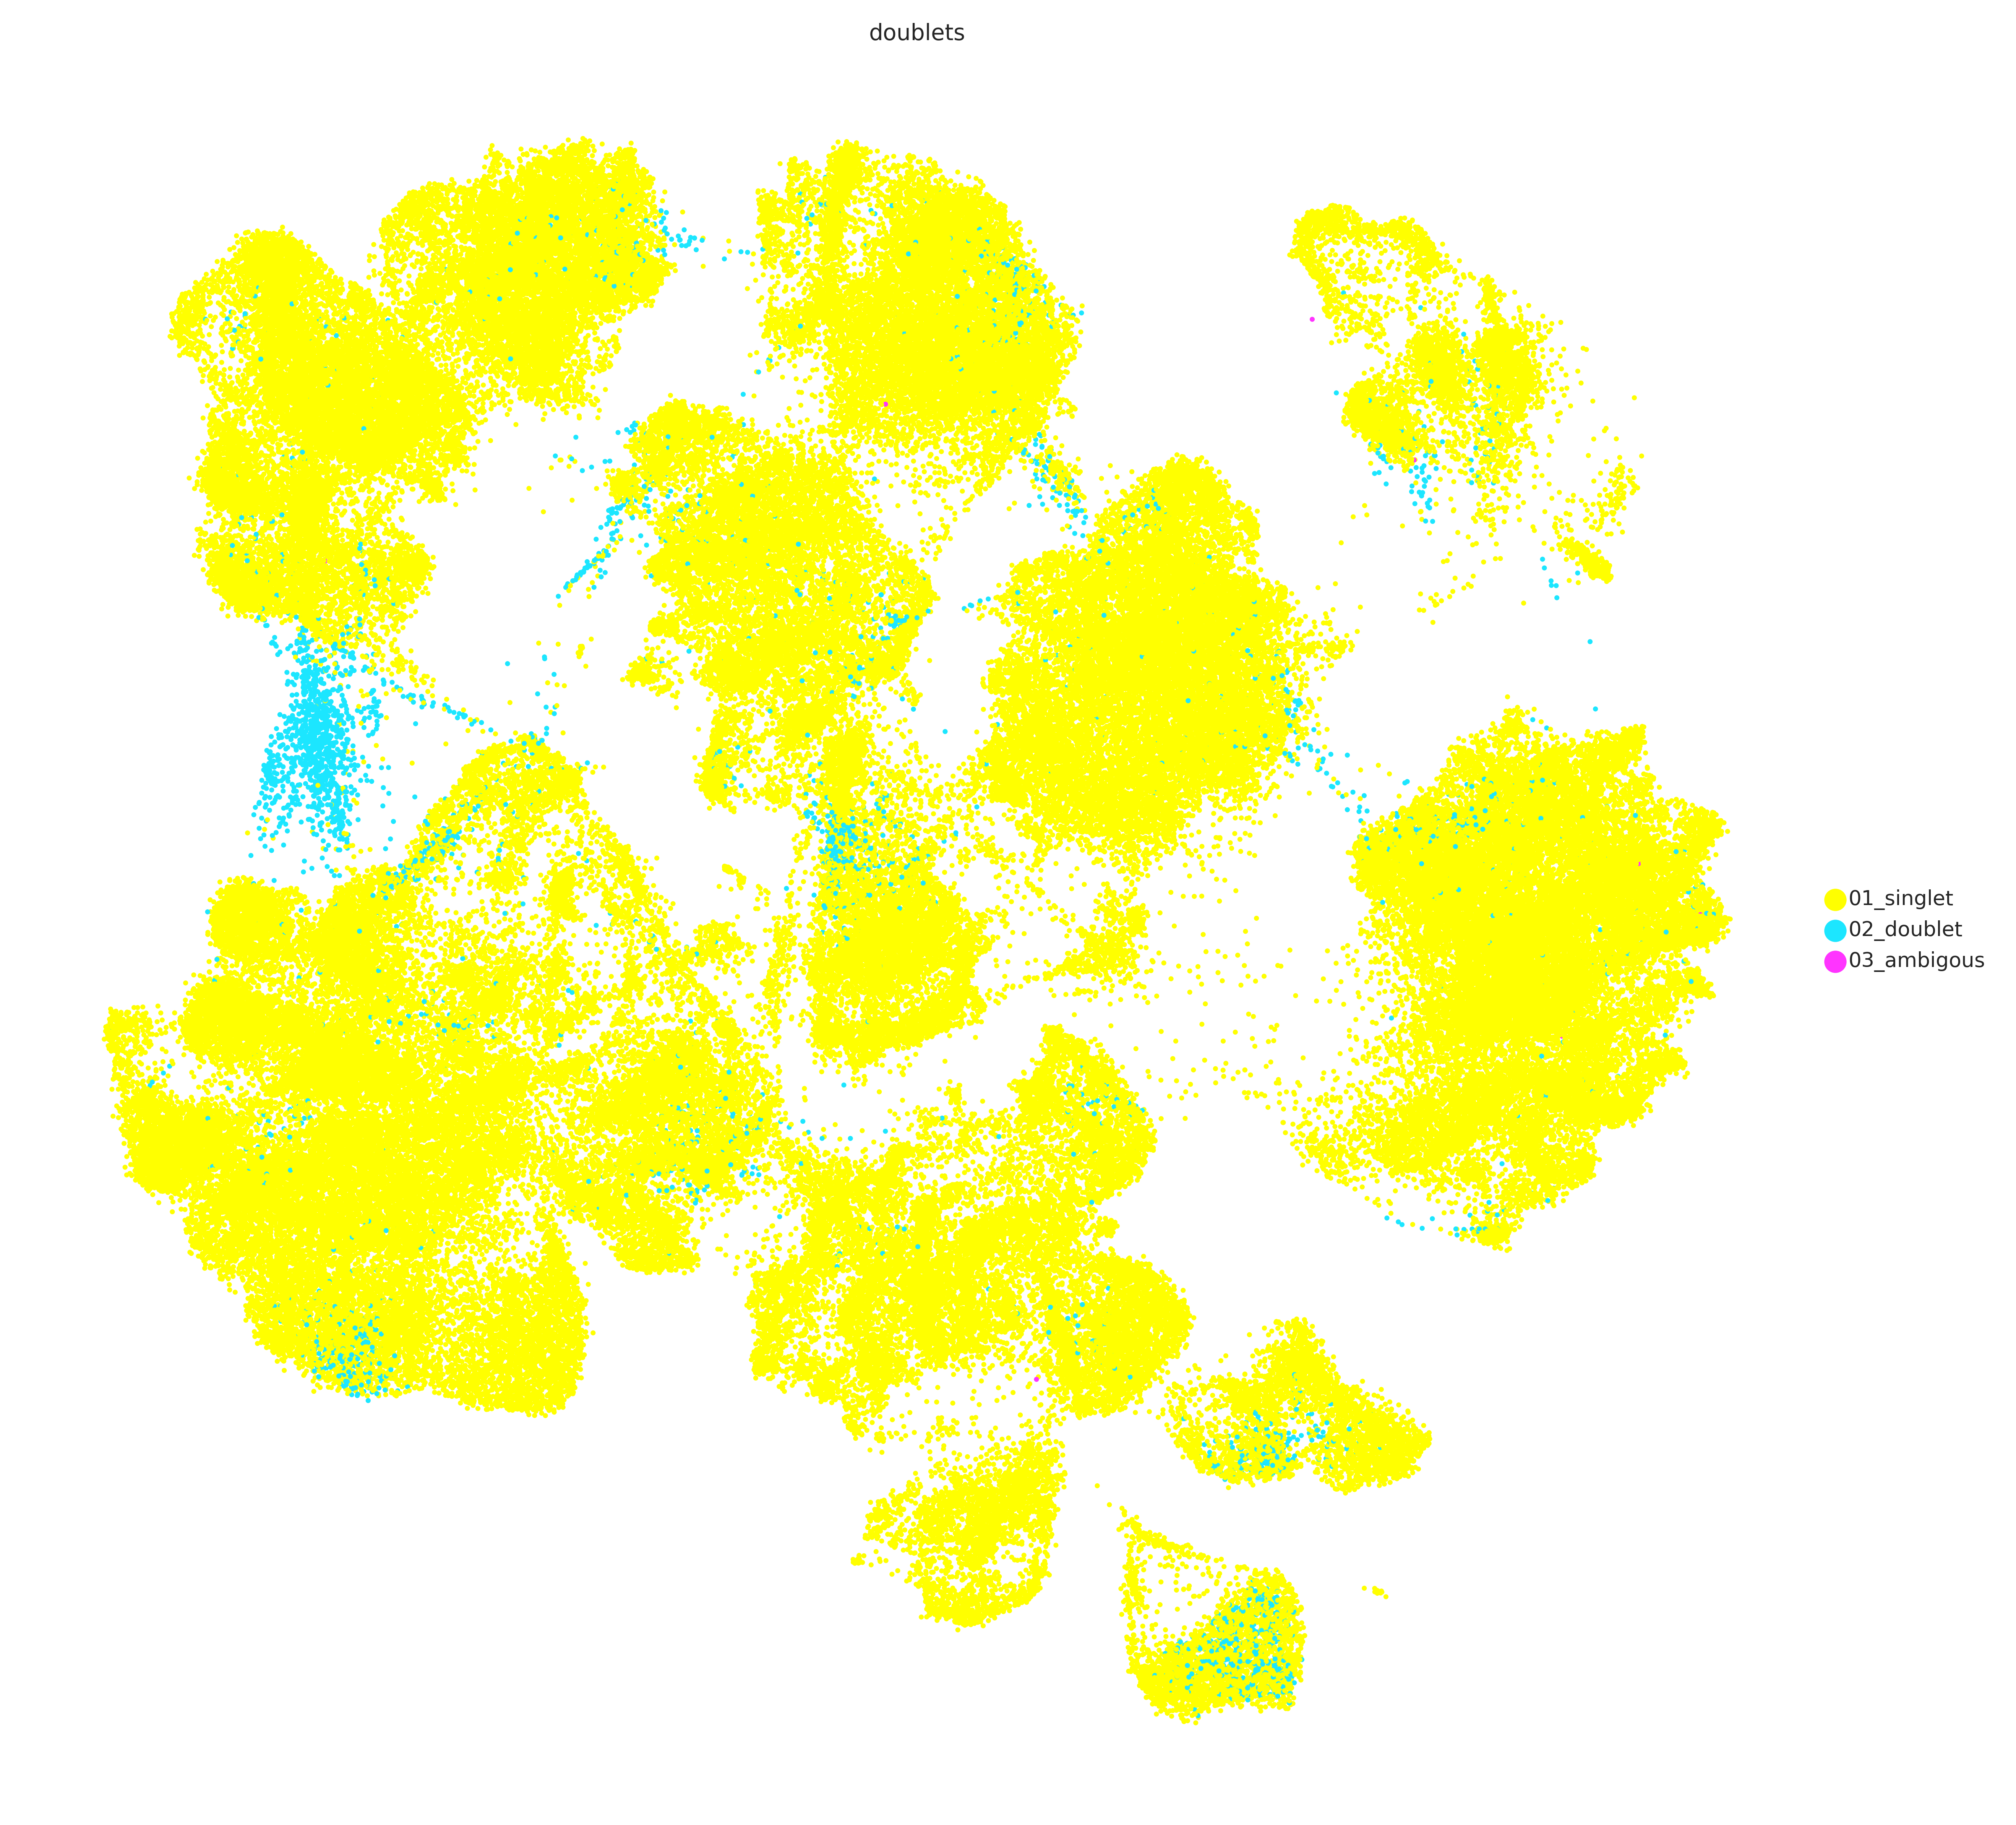

In [46]:
sc.pl.umap(adata_nodrops_nodub, color=['doublets'], palette= color_map_clusters , use_raw= False, s=10)

In [47]:
adata_nodrops_nodub = adata_nodrops_nodub[adata_nodrops_nodub.obs["doublets"]=='01_singlet']

In [48]:
adata_nodrops_nodub

View of AnnData object with n_obs × n_vars = 166579 × 20761
    obs: 'batch', 'primary_tumor', 'Limited', 'PValue_emptydrops', 'FDR_emptydrops', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell', 'empty_droplet_sig', 'doublets'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'umap', 'doublets_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

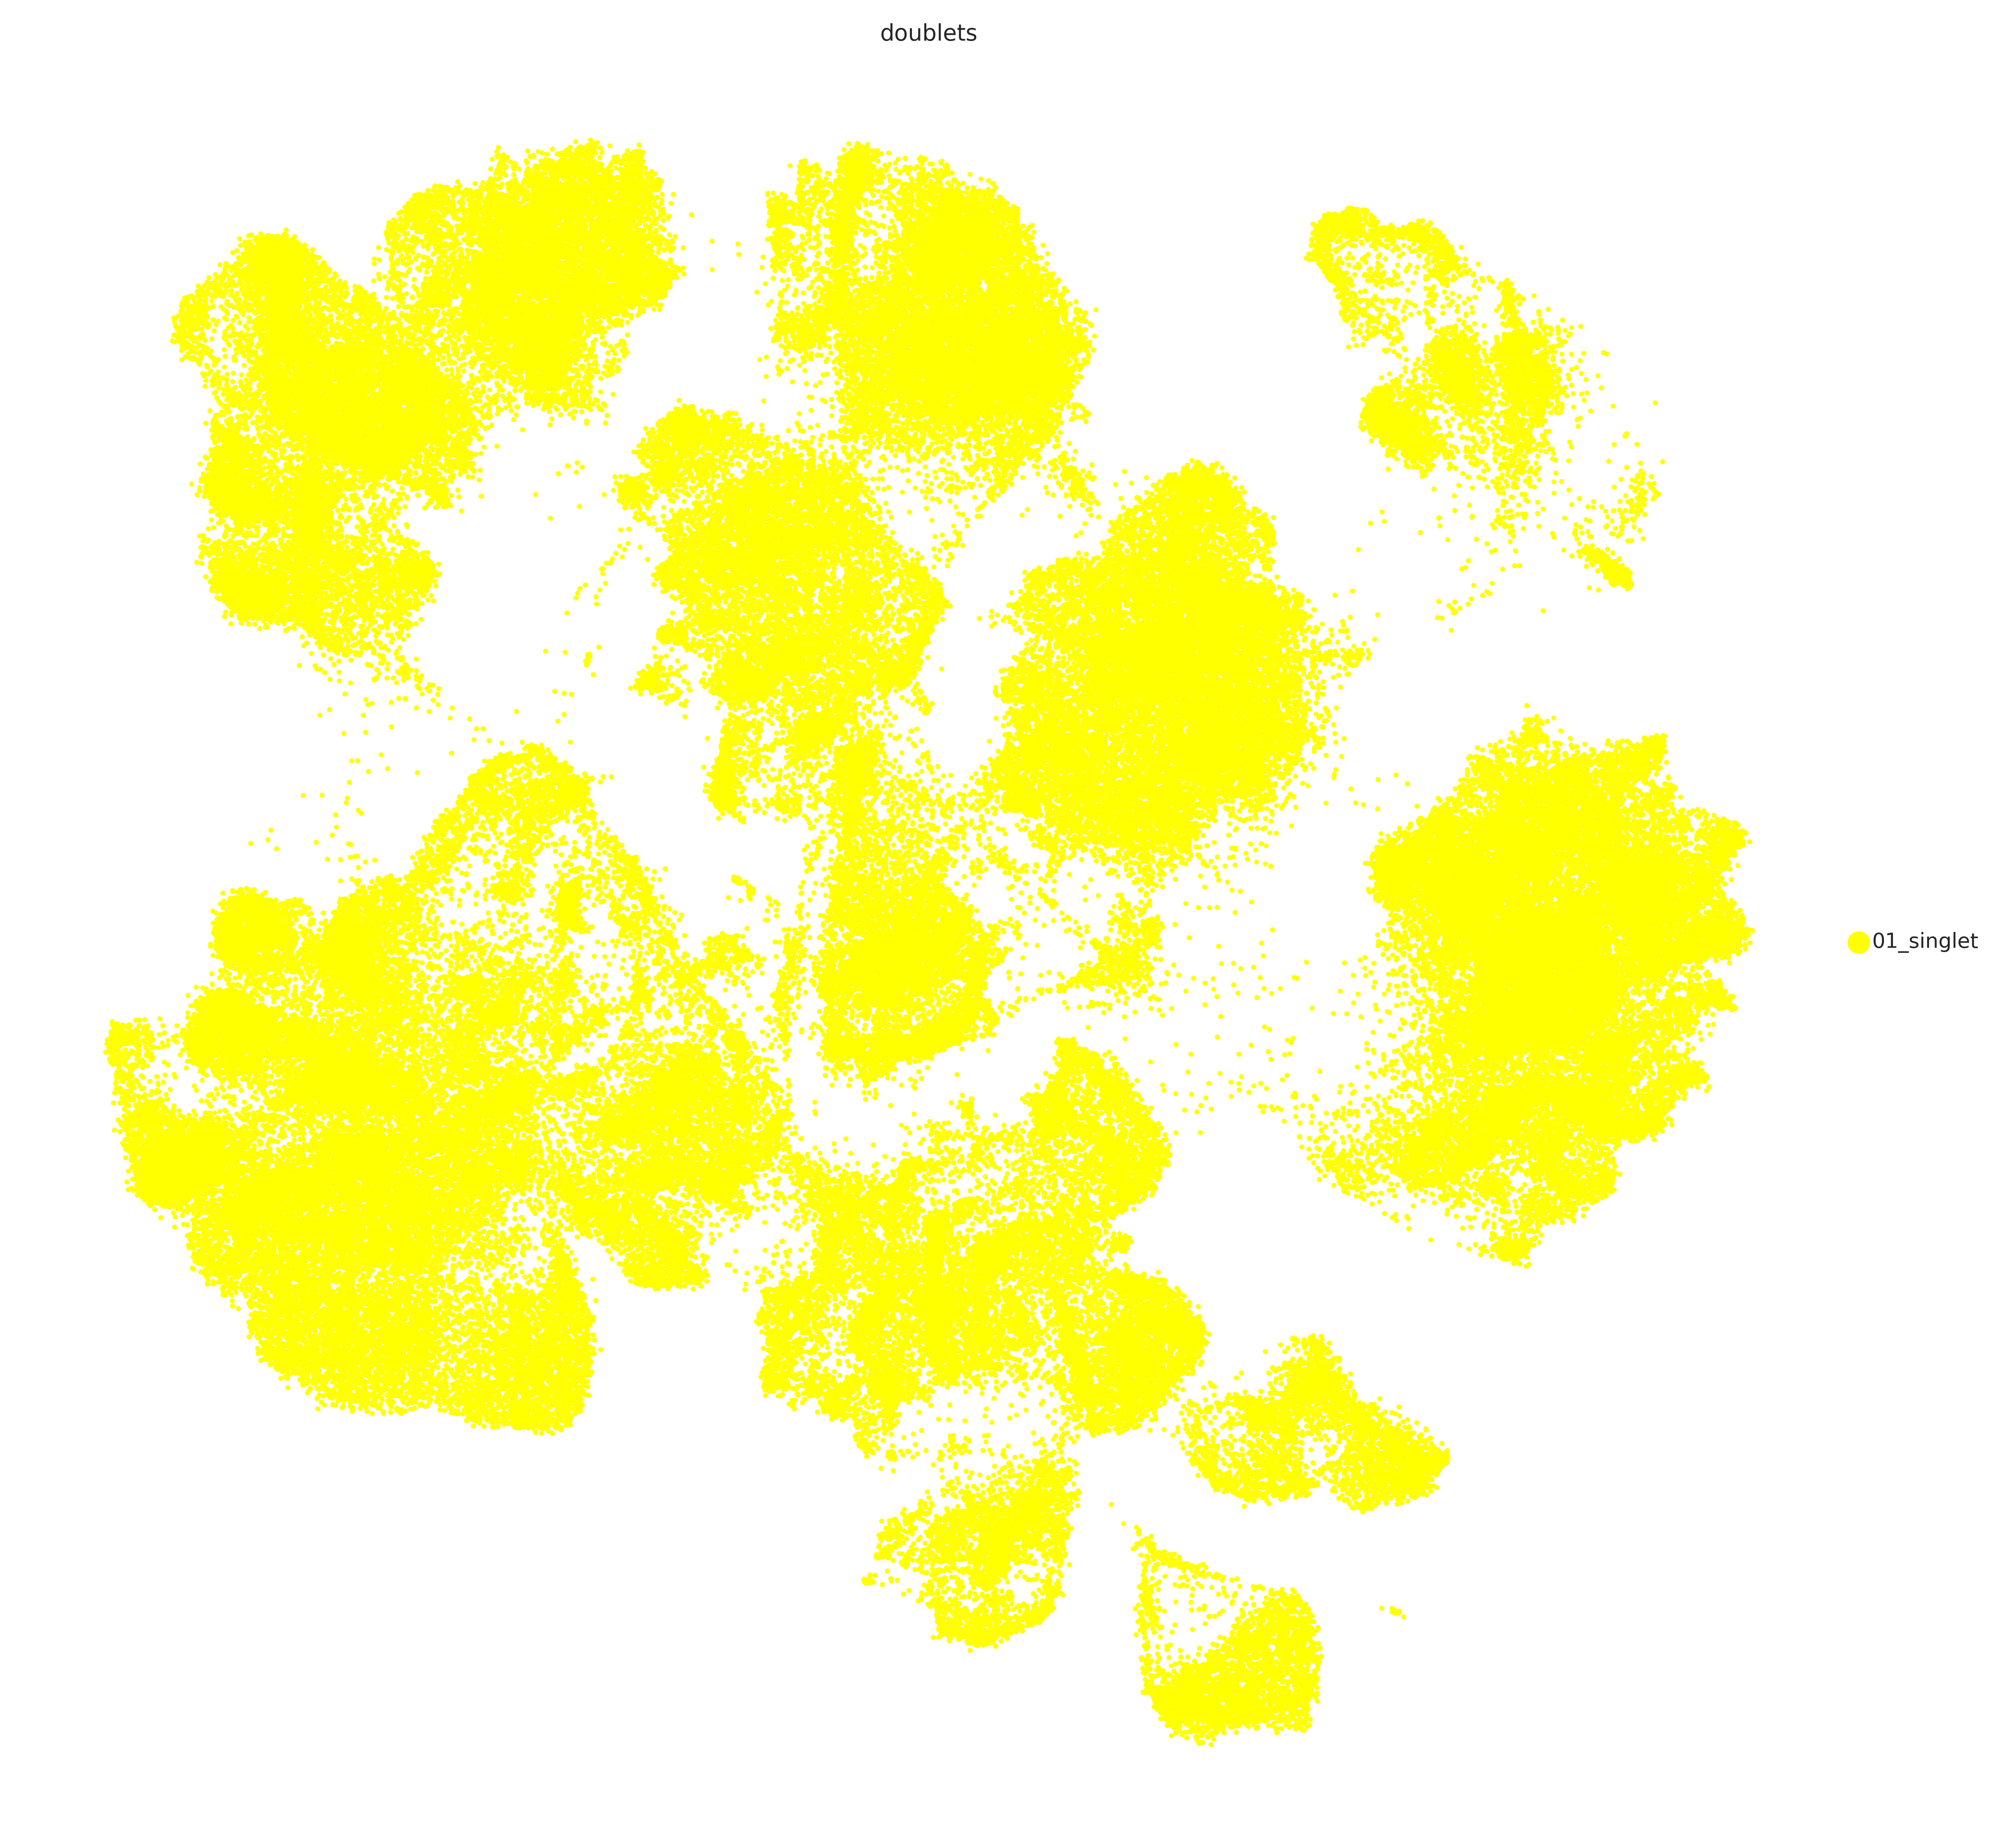

In [50]:
sc.pl.umap(adata_nodrops_nodub, color=['doublets'], palette= color_map_clusters , use_raw= False, s=10)

In [51]:
adata_nodrops_nodub.write('/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-all_samples_raw_filtered_normalized_log1p_clustered_nodrop_nodub_removed_final.h5ad')